In [22]:
!wget https://github.com/shijoshaji10/Sentiment-analysis--Deep-learning/blob/main/SemEval2017-task4-dev.subtask-A.english.INPUT.txt

--2024-08-01 13:14:36--  https://github.com/shijoshaji10/Sentiment-analysis--Deep-learning/blob/main/SemEval2017-task4-dev.subtask-A.english.INPUT.txt
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘SemEval2017-task4-dev.subtask-A.english.INPUT.txt’

SemEval2017-task4-d     [  <=>               ] 287.70K   936KB/s    in 0.3s    

2024-08-01 13:14:37 (936 KB/s) - ‘SemEval2017-task4-dev.subtask-A.english.INPUT.txt’ saved [294607]



In [15]:
import string
import nltk
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SimpleRNN, LSTM


In [2]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Load data
df_data = pd.read_csv('/content/SemEval2017-task4-dev.subtask-A.english.INPUT.txt', sep='\t', header=None)
print(df_data.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                    0         1  \
0  619950566786113536   neutral   
1  619969366986235905   neutral   
2  619971047195045888  negative   
3  619974445185302528   neutral   
4  619987808317407232  positive   

                                                   2    3  
0  Picturehouse's, Pink Floyd's, 'Roger Waters: T...  NaN  
1  Order Go Set a Watchman in store or through ou...  NaN  
2  If these runway renovations at the airport pre...  NaN  
3  If you could ask an onstage interview question...  NaN  
4  A portion of book sales from our Harper Lee/Go...  NaN  


In [3]:
# Extract texts and labels
np_texts = df_data[2].to_numpy()
np_labels = df_data[1].to_numpy()

In [4]:
# Set of stopwords and punctuation
stop_words = set(stopwords.words('english'))

In [5]:
# Preprocess text
def preprocess_text(texts):
    preprocessed_texts = []
    for text in texts:
        tokens = word_tokenize(text)
        clean_tokens = [token.lower() for token in tokens if token.lower() not in stop_words and
                        token.lower() not in string.punctuation and
                        not token.startswith('@') and
                        not token.startswith('http') and
                        not token.startswith(tuple(string.punctuation))]
        preprocessed_texts.append(" ".join(clean_tokens))
    return preprocessed_texts

preprocessed_texts = preprocess_text(np_texts)
print(preprocessed_texts)

['picturehouse pink floyd waters walll opening 29 sept making waves watch trailer rolling stone look', 'order go set watchman store website tuesday get half price gsaw gsawatchmanbook', 'runway renovations airport prevent seeing taylor swift monday bad blood new meaning', 'could ask onstage interview question miss usa tomorrow would', 'portion book sales harper lee/go set watchman release party mon 7/13 support cap_tulsa great work', 'excited read go set watchman tuesday possibly live kill mockingbird opinions', 'watching miss usa tomorrow see travisgarland perform obsessed voice', 'tune-in 2015 miss usa pageant reelzchannel sunday july 12 8p et/5p pt contestants 50', 'call reservations lunch dinner tomorrow yep sunday happy accommodate guests town miss usa pageant 346-5100', "miss universe org prez tells trump wo n't attend sunday miss usa event missed past said recently", 'trump said june 30th miss usa pageant baton rouge organizers say coming word yet camp plans', "n't read kill moc

In [6]:
# Tokenization and padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_texts)
sequences = tokenizer.texts_to_sequences(preprocessed_texts)
word_index = tokenizer.word_index  # Ensure word_index is defined here
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')


In [7]:
# Convert labels to categorical
labels = pd.get_dummies(np_labels).values

In [8]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=40)
print(f'Train set size: {len(x_train)}, Test set size: {len(x_test)}')


Train set size: 16505, Test set size: 4127


In [9]:
# CNN Model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=max_length))
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(3, activation='softmax'))  # 3 classes: positive, negative, neutral

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train CNN
cnn_history = cnn_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate CNN
cnn_loss, cnn_accuracy = cnn_model.evaluate(x_test, y_test)
print(f'CNN Accuracy: {cnn_accuracy}')

Epoch 1/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.5169 - loss: 0.9652 - val_accuracy: 0.6548 - val_loss: 0.7640
Epoch 2/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.7673 - loss: 0.5725 - val_accuracy: 0.6245 - val_loss: 0.8134
Epoch 3/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.9180 - loss: 0.2356 - val_accuracy: 0.6269 - val_loss: 1.1851
Epoch 4/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.9762 - loss: 0.0797 - val_accuracy: 0.6311 - val_loss: 1.5106
Epoch 5/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.9918 - loss: 0.0304 - val_accuracy: 0.6220 - val_loss: 1.6331
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5898 - loss: 1.7573
CNN Accuracy: 0.6001938581466675


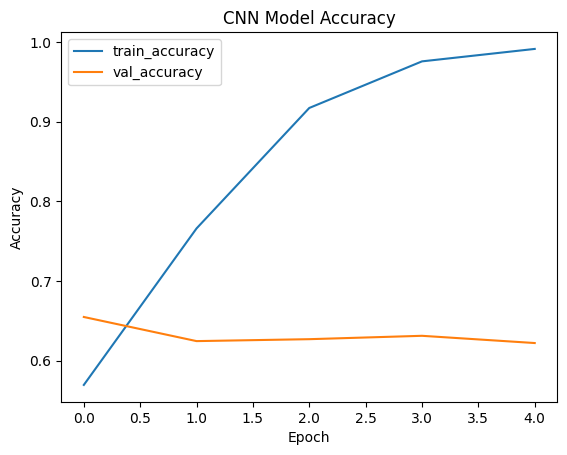

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


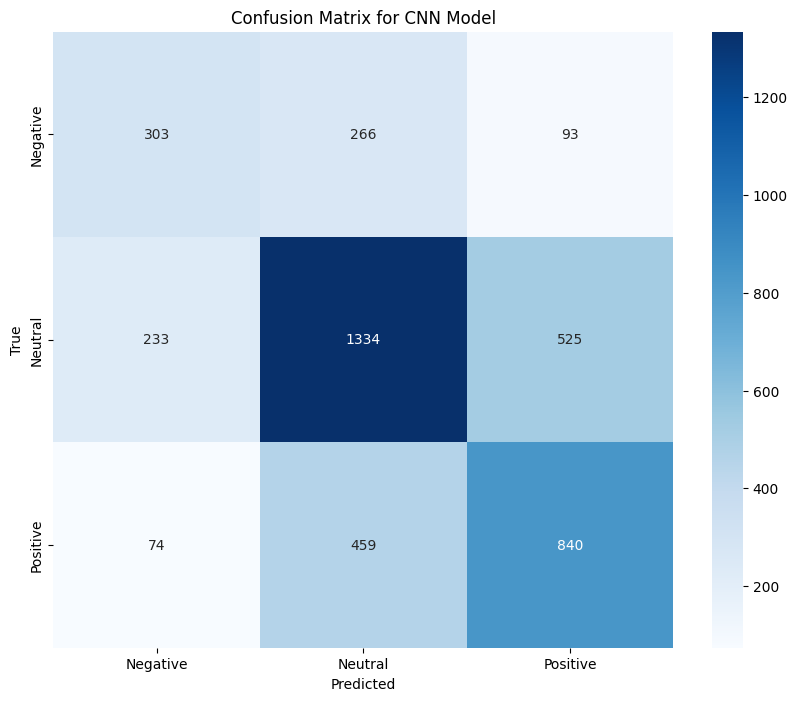

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
CNN F1 Score: 0.5996537867194462
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
CNN Accuracy: 0.6001938454082869
CNN Precision: 0.599767045425545
CNN Recall: 0.6001938454082869
CNN F1 Score: 0.5996537867194462


In [12]:
# Plot training history
plt.plot(cnn_history.history['accuracy'], label='train_accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='val_accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion Matrix
y_pred = cnn_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for CNN Model')
plt.show()

# F1 Score for CNN
y_pred_classes_cnn = np.argmax(cnn_model.predict(x_test), axis=1)
y_true_cnn = np.argmax(y_test, axis=1)
f1_score_cnn = f1_score(y_true_cnn, y_pred_classes_cnn, average='weighted')
print(f'CNN F1 Score: {f1_score_cnn}')

# Calculate metrics for CNN
y_pred_classes_cnn = np.argmax(cnn_model.predict(x_test), axis=1)
y_true_cnn = np.argmax(y_test, axis=1)
accuracy_cnn = accuracy_score(y_true_cnn, y_pred_classes_cnn)
precision_cnn = precision_score(y_true_cnn, y_pred_classes_cnn, average='weighted')
recall_cnn = recall_score(y_true_cnn, y_pred_classes_cnn, average='weighted')
f1_score_cnn = f1_score(y_true_cnn, y_pred_classes_cnn, average='weighted')

print(f'CNN Accuracy: {accuracy_cnn}')
print(f'CNN Precision: {precision_cnn}')
print(f'CNN Recall: {recall_cnn}')
print(f'CNN F1 Score: {f1_score_cnn}')

In [16]:
# RNN Model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=max_length))
rnn_model.add(SimpleRNN(128, return_sequences=False))
rnn_model.add(Dense(128, activation='relu'))
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(3, activation='softmax'))

rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rnn_model.summary()

# Train RNN
rnn_history = rnn_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate RNN
rnn_loss, rnn_accuracy = rnn_model.evaluate(x_test, y_test)
print(f'RNN Accuracy: {rnn_accuracy}')


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.4805 - loss: 1.0296 - val_accuracy: 0.4924 - val_loss: 1.0158
Epoch 2/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.5002 - loss: 1.0101 - val_accuracy: 0.4936 - val_loss: 1.0056
Epoch 3/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.5060 - loss: 0.9922 - val_accuracy: 0.4924 - val_loss: 1.0096
Epoch 4/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 53s 76ms/step - accuracy: 0.5423 - loss: 0.9412 - val_accuracy: 0.4737 - val_loss: 1.0355
Epoch 5/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.5900 - loss: 0.8850 - val_accuracy: 0.4827 - val_loss: 1.0321
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5032 - loss: 1.0140
RNN Accuracy: 0.4947904050350189


In [17]:
# LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=max_length))
lstm_model.add(LSTM(128, return_sequences=False))
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(3, activation='softmax'))

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lstm_model.summary()

# Train LSTM
lstm_history = lstm_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate LSTM
lstm_loss, lstm_accuracy = lstm_model.evaluate(x_test, y_test)
print(f'LSTM Accuracy: {lstm_accuracy}')

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 49s 98ms/step - accuracy: 0.4889 - loss: 1.0140 - val_accuracy: 0.5457 - val_loss: 0.8896
Epoch 2/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 86s 107ms/step - accuracy: 0.5433 - loss: 0.8401 - val_accuracy: 0.6451 - val_loss: 0.8067
Epoch 3/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 77s 97ms/step - accuracy: 0.7507 - loss: 0.6104 - val_accuracy: 0.6747 - val_loss: 0.8230
Epoch 4/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 45s 98ms/step - accuracy: 0.8566 - loss: 0.3902 - val_accuracy: 0.6202 - val_loss: 0.9399
Epoch 5/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 44s 95ms/step - accuracy: 0.9146 - loss: 0.2499 - val_accuracy: 0.6354 - val_loss: 1.1819
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.6095 - loss: 1.2012
LSTM Accuracy: 0.6161860823631287


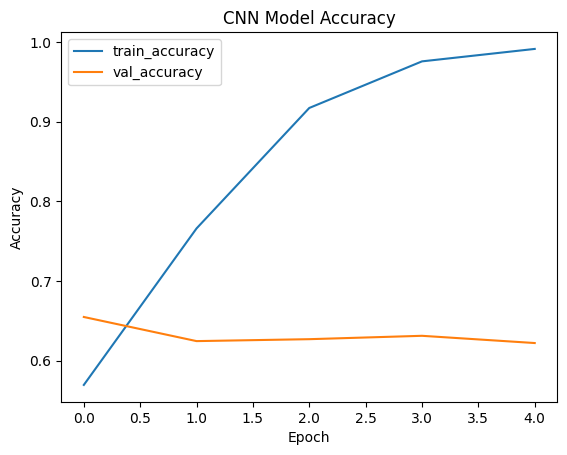

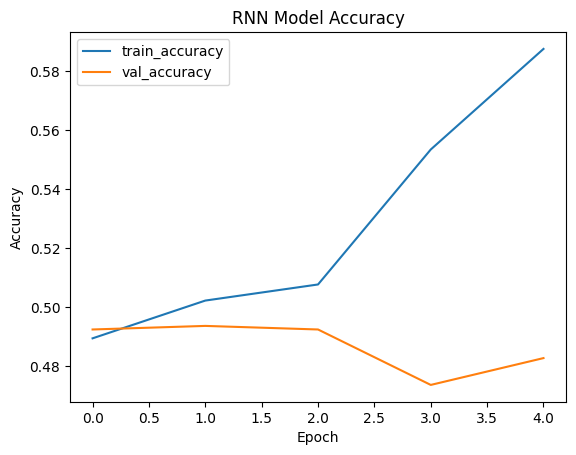

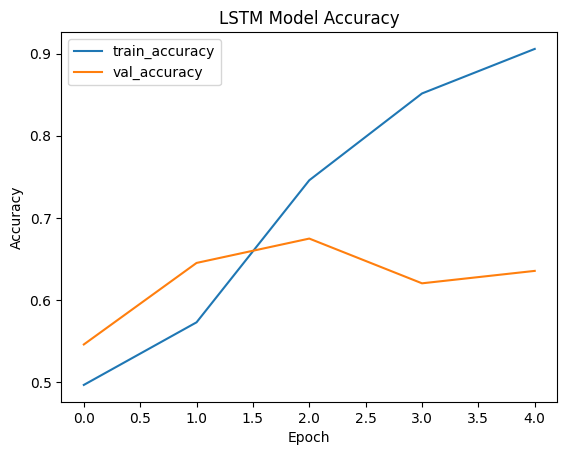

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


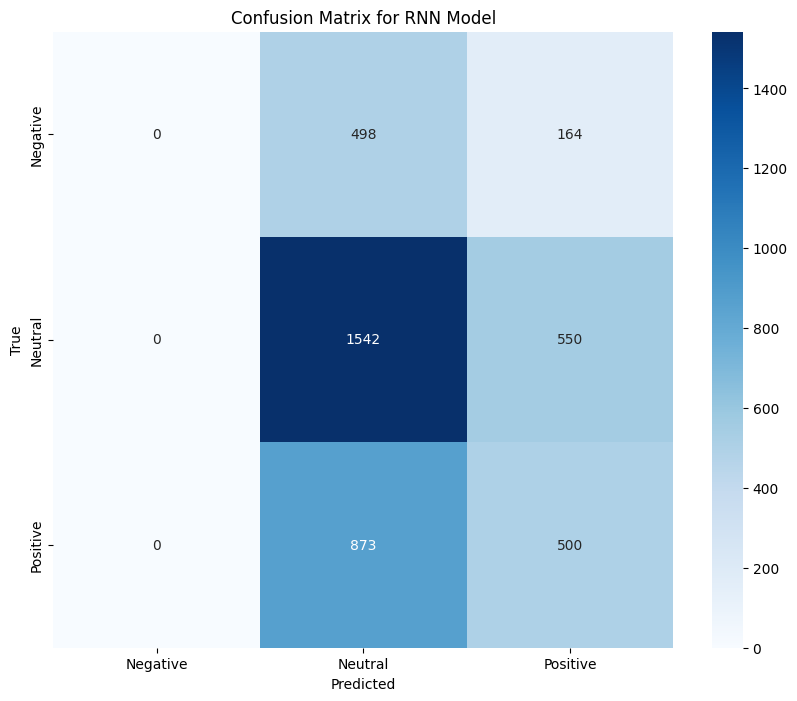

129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step


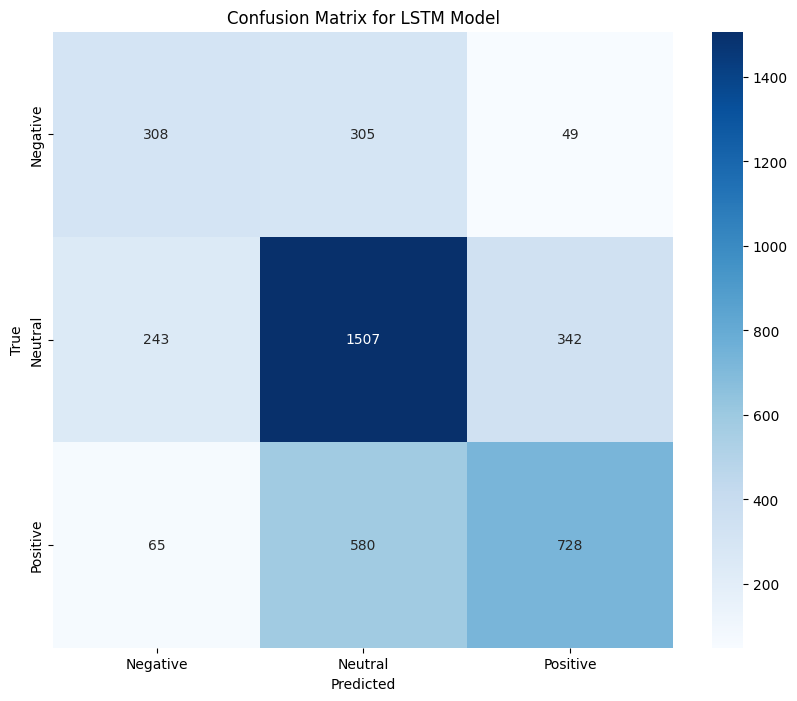

In [20]:
# Plot training history
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(f'{title} Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(cnn_history, 'CNN')
plot_history(rnn_history, 'RNN')
plot_history(lstm_history, 'LSTM')

# Confusion Matrix for RNN
y_pred_rnn = rnn_model.predict(x_test)
y_pred_classes_rnn = np.argmax(y_pred_rnn, axis=1)
y_true_rnn = np.argmax(y_test, axis=1)

conf_matrix_rnn = confusion_matrix(y_true_rnn, y_pred_classes_rnn)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rnn, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for RNN Model')
plt.show()

# Confusion Matrix for LSTM as an example
y_pred = lstm_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for LSTM Model')
plt.show()


In [19]:
# Calculate metrics for RNN
y_pred_classes_rnn = np.argmax(rnn_model.predict(x_test), axis=1)
y_true_rnn = np.argmax(y_test, axis=1)
accuracy_rnn = accuracy_score(y_true_rnn, y_pred_classes_rnn)
precision_rnn = precision_score(y_true_rnn, y_pred_classes_rnn, average='weighted')
recall_rnn = recall_score(y_true_rnn, y_pred_classes_rnn, average='weighted')
f1_score_rnn = f1_score(y_true_rnn, y_pred_classes_rnn, average='weighted')

print(f'RNN Accuracy: {accuracy_rnn}')
print(f'RNN Precision: {precision_rnn}')
print(f'RNN Recall: {recall_rnn}')
print(f'RNN F1 Score: {f1_score_rnn}')

# Calculate metrics for LSTM
y_pred_classes_lstm = np.argmax(lstm_model.predict(x_test), axis=1)
y_true_lstm = np.argmax(y_test, axis=1)
accuracy_lstm = accuracy_score(y_true_lstm, y_pred_classes_lstm)
precision_lstm = precision_score(y_true_lstm, y_pred_classes_lstm, average='weighted')
recall_lstm = recall_score(y_true_lstm, y_pred_classes_lstm, average='weighted')
f1_score_lstm = f1_score(y_true_lstm, y_pred_classes_lstm, average='weighted')

print(f'LSTM Accuracy: {accuracy_lstm}')
print(f'LSTM Precision: {precision_lstm}')
print(f'LSTM Recall: {recall_lstm}')
print(f'LSTM F1 Score: {f1_score_lstm}')

129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RNN Accuracy: 0.4947904046522898
RNN Precision: 0.40535223512406404
RNN Recall: 0.4947904046522898
RNN F1 Score: 0.44094672144735886
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step
LSTM Accuracy: 0.6161860915919554
LSTM Precision: 0.6160025504546176
LSTM Recall: 0.6161860915919554
LSTM F1 Score: 0.6124214109687124
